## Introduction

This is a homework for 6-7 weeks

Importing libraries:

In [4]:
import numpy as np # used for handling numbers
import pandas as pd

from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling


from matplotlib import style
style.use('dark_background')

Importing the 'xlsx' document as a pandas data frame:

In [5]:
df = pd.read_excel('car_sells.xlsx')
df.shape

(372, 14)

In [6]:
df

,Brand,Name,Year,Price,Currency,Город,Кузов,"Объем двигателя, л",Пробег,Коробка передач,Руль,Цвет,Привод,Растаможен в Казахстане
0,ВАЗ (Lada),Largus,2013,3100000,₸,Шымкент,универсал,1.6 (газ-бензин),NaN,механика,слева,белый,передний привод,Да
1,Daewoo,Nexia,2012,2100000,₸,Шымкент,седан,1.6 (бензин),141 000 км,механика,слева,серебристый металлик,передний привод,Да
2,Mitsubishi,Outlander,2013,6500000,₸,Шымкент,кроссовер,2.4 (бензин),100 375 км,автомат,слева,черный металлик,полный привод,Да
3,УАЗ,Hunter,2017,4500000,₸,Шымкент,внедорожник,2.7 (бензин),55 000 км,механика,слева,NaN,полный привод,Да
4,ВАЗ (Lada),2190 (седан),2018,3650000,₸,Шымкент,седан,1.6 (бензин),23 500 км,механика,слева,серебристый металлик,передний привод,Да
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,Toyota,Camry,2017,13000000,₸,Шымкент,седан,2.5 (бензин),139 000 км,автомат,слева,белый металлик,передний привод,Да
368,Ravon,R4,2017,4250000,₸,Шымкент,седан,1.5 (бензин),49 500 км,механика,слева,белый металлик,передний привод,Да
369,Hyundai,Solaris,2011,2900000,₸,Шымкент,седан,1.4 (бензин),170 000 км,автомат,слева,серый металлик,передний привод,Нет
370,Renault,Kaptur,2020,9796000,₸,Шымкент,кроссовер,1.6 (бензин),NaN,механика,слева,NaN,передний привод,Да


Some cleaning operations going on:

In [7]:
df[['Объем двигателя, л', 'Топливо']] = df['Объем двигателя, л'].str.split(' ', expand=True)

df['Топливо'] = df['Топливо'].str.replace('(', '')
df['Топливо'] = df['Топливо'].str.replace(')', '')

df

,Brand,Name,Year,Price,Currency,Город,Кузов,"Объем двигателя, л",Пробег,Коробка передач,Руль,Цвет,Привод,Растаможен в Казахстане,Топливо
0,ВАЗ (Lada),Largus,2013,3100000,₸,Шымкент,универсал,1.6,NaN,механика,слева,белый,передний привод,Да,газ-бензин
1,Daewoo,Nexia,2012,2100000,₸,Шымкент,седан,1.6,141 000 км,механика,слева,серебристый металлик,передний привод,Да,бензин
2,Mitsubishi,Outlander,2013,6500000,₸,Шымкент,кроссовер,2.4,100 375 км,автомат,слева,черный металлик,полный привод,Да,бензин
3,УАЗ,Hunter,2017,4500000,₸,Шымкент,внедорожник,2.7,55 000 км,механика,слева,NaN,полный привод,Да,бензин
4,ВАЗ (Lada),2190 (седан),2018,3650000,₸,Шымкент,седан,1.6,23 500 км,механика,слева,серебристый металлик,передний привод,Да,бензин
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,Toyota,Camry,2017,13000000,₸,Шымкент,седан,2.5,139 000 км,автомат,слева,белый металлик,передний привод,Да,бензин
368,Ravon,R4,2017,4250000,₸,Шымкент,седан,1.5,49 500 км,механика,слева,белый металлик,передний привод,Да,бензин
369,Hyundai,Solaris,2011,2900000,₸,Шымкент,седан,1.4,170 000 км,автомат,слева,серый металлик,передний привод,Нет,бензин
370,Renault,Kaptur,2020,9796000,₸,Шымкент,кроссовер,1.6,NaN,механика,слева,NaN,передний привод,Да,бензин


And so, cleaning, shaping and etc...:

In [8]:
df['Пробег'] = df['Пробег'].str.replace(' км', '')
df

,Brand,Name,Year,Price,Currency,Город,Кузов,"Объем двигателя, л",Пробег,Коробка передач,Руль,Цвет,Привод,Растаможен в Казахстане,Топливо
0,ВАЗ (Lada),Largus,2013,3100000,₸,Шымкент,универсал,1.6,NaN,механика,слева,белый,передний привод,Да,газ-бензин
1,Daewoo,Nexia,2012,2100000,₸,Шымкент,седан,1.6,141 000,механика,слева,серебристый металлик,передний привод,Да,бензин
2,Mitsubishi,Outlander,2013,6500000,₸,Шымкент,кроссовер,2.4,100 375,автомат,слева,черный металлик,полный привод,Да,бензин
3,УАЗ,Hunter,2017,4500000,₸,Шымкент,внедорожник,2.7,55 000,механика,слева,NaN,полный привод,Да,бензин
4,ВАЗ (Lada),2190 (седан),2018,3650000,₸,Шымкент,седан,1.6,23 500,механика,слева,серебристый металлик,передний привод,Да,бензин
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,Toyota,Camry,2017,13000000,₸,Шымкент,седан,2.5,139 000,автомат,слева,белый металлик,передний привод,Да,бензин
368,Ravon,R4,2017,4250000,₸,Шымкент,седан,1.5,49 500,механика,слева,белый металлик,передний привод,Да,бензин
369,Hyundai,Solaris,2011,2900000,₸,Шымкент,седан,1.4,170 000,автомат,слева,серый металлик,передний привод,Нет,бензин
370,Renault,Kaptur,2020,9796000,₸,Шымкент,кроссовер,1.6,NaN,механика,слева,NaN,передний привод,Да,бензин


Deleting columns that wouldn't be used in this task:

In [9]:
del df['Город']
del df['Currency']
del df['Цвет']

df

,Brand,Name,Year,Price,Кузов,"Объем двигателя, л",Пробег,Коробка передач,Руль,Привод,Растаможен в Казахстане,Топливо
0,ВАЗ (Lada),Largus,2013,3100000,универсал,1.6,NaN,механика,слева,передний привод,Да,газ-бензин
1,Daewoo,Nexia,2012,2100000,седан,1.6,141 000,механика,слева,передний привод,Да,бензин
2,Mitsubishi,Outlander,2013,6500000,кроссовер,2.4,100 375,автомат,слева,полный привод,Да,бензин
3,УАЗ,Hunter,2017,4500000,внедорожник,2.7,55 000,механика,слева,полный привод,Да,бензин
4,ВАЗ (Lada),2190 (седан),2018,3650000,седан,1.6,23 500,механика,слева,передний привод,Да,бензин
...,...,...,...,...,...,...,...,...,...,...,...,...
367,Toyota,Camry,2017,13000000,седан,2.5,139 000,автомат,слева,передний привод,Да,бензин
368,Ravon,R4,2017,4250000,седан,1.5,49 500,механика,слева,передний привод,Да,бензин
369,Hyundai,Solaris,2011,2900000,седан,1.4,170 000,автомат,слева,передний привод,Нет,бензин
370,Renault,Kaptur,2020,9796000,кроссовер,1.6,NaN,механика,слева,передний привод,Да,бензин


Fixing and Removing NaN values in Data Set:

In [10]:
df.replace('NaN', 'null')
df.replace('null', np.nan)

,Brand,Name,Year,Price,Кузов,"Объем двигателя, л",Пробег,Коробка передач,Руль,Привод,Растаможен в Казахстане,Топливо
0,ВАЗ (Lada),Largus,2013,3100000,универсал,1.6,NaN,механика,слева,передний привод,Да,газ-бензин
1,Daewoo,Nexia,2012,2100000,седан,1.6,141 000,механика,слева,передний привод,Да,бензин
2,Mitsubishi,Outlander,2013,6500000,кроссовер,2.4,100 375,автомат,слева,полный привод,Да,бензин
3,УАЗ,Hunter,2017,4500000,внедорожник,2.7,55 000,механика,слева,полный привод,Да,бензин
4,ВАЗ (Lada),2190 (седан),2018,3650000,седан,1.6,23 500,механика,слева,передний привод,Да,бензин
...,...,...,...,...,...,...,...,...,...,...,...,...
367,Toyota,Camry,2017,13000000,седан,2.5,139 000,автомат,слева,передний привод,Да,бензин
368,Ravon,R4,2017,4250000,седан,1.5,49 500,механика,слева,передний привод,Да,бензин
369,Hyundai,Solaris,2011,2900000,седан,1.4,170 000,автомат,слева,передний привод,Нет,бензин
370,Renault,Kaptur,2020,9796000,кроссовер,1.6,NaN,механика,слева,передний привод,Да,бензин


In [11]:
df = df.dropna()
df

,Brand,Name,Year,Price,Кузов,"Объем двигателя, л",Пробег,Коробка передач,Руль,Привод,Растаможен в Казахстане,Топливо
1,Daewoo,Nexia,2012,2100000,седан,1.6,141 000,механика,слева,передний привод,Да,бензин
2,Mitsubishi,Outlander,2013,6500000,кроссовер,2.4,100 375,автомат,слева,полный привод,Да,бензин
3,УАЗ,Hunter,2017,4500000,внедорожник,2.7,55 000,механика,слева,полный привод,Да,бензин
4,ВАЗ (Lada),2190 (седан),2018,3650000,седан,1.6,23 500,механика,слева,передний привод,Да,бензин
5,Nissan,Almera,2018,4600000,седан,1.6,60 908,автомат,слева,передний привод,Да,бензин
...,...,...,...,...,...,...,...,...,...,...,...,...
363,ВАЗ (Lada),2190 (седан),2013,1800000,седан,1.6,169 999,механика,слева,передний привод,Да,бензин
367,Toyota,Camry,2017,13000000,седан,2.5,139 000,автомат,слева,передний привод,Да,бензин
368,Ravon,R4,2017,4250000,седан,1.5,49 500,механика,слева,передний привод,Да,бензин
369,Hyundai,Solaris,2011,2900000,седан,1.4,170 000,автомат,слева,передний привод,Нет,бензин


In [12]:
df.describe()

,Year,Price
count,257.000000,2.570000e+02
mean,2015.385214,8.954910e+06
std,2.983590,7.700214e+06
min,2010.000000,6.800000e+05
25%,2013.000000,3.900000e+06
50%,2015.000000,6.800000e+06
75%,2018.000000,1.150000e+07
max,2021.000000,4.800000e+07


Working with data types:

In [13]:
df.dtypes

Brand                      object
Name                       object
Year                        int64
Price                       int64
Кузов                      object
Объем двигателя, л         object
Пробег                     object
Коробка передач            object
Руль                       object
Привод                     object
Растаможен в Казахстане    object
Топливо                    object
dtype: object

In [14]:
df['Объем двигателя, л'] = df['Объем двигателя, л'].astype('float')

df['Пробег'] = df['Пробег'].str.replace(' ', '')
df['Пробег'] = df['Пробег'].astype('float')

df.dtypes

<ipython-input-14-fecfba755a0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Объем двигателя, л'] = df['Объем двигателя, л'].astype('float')
<ipython-input-14-fecfba755a0a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Пробег'] = df['Пробег'].str.replace(' ', '')
<ipython-input-14-fecfba755a0a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

Brand                       object
Name                        object
Year                         int64
Price                        int64
Кузов                       object
Объем двигателя, л         float64
Пробег                     float64
Коробка передач             object
Руль                        object
Привод                      object
Растаможен в Казахстане     object
Топливо                     object
dtype: object

In [15]:
df

,Brand,Name,Year,Price,Кузов,"Объем двигателя, л",Пробег,Коробка передач,Руль,Привод,Растаможен в Казахстане,Топливо
1,Daewoo,Nexia,2012,2100000,седан,1.6,141000.0,механика,слева,передний привод,Да,бензин
2,Mitsubishi,Outlander,2013,6500000,кроссовер,2.4,100375.0,автомат,слева,полный привод,Да,бензин
3,УАЗ,Hunter,2017,4500000,внедорожник,2.7,55000.0,механика,слева,полный привод,Да,бензин
4,ВАЗ (Lada),2190 (седан),2018,3650000,седан,1.6,23500.0,механика,слева,передний привод,Да,бензин
5,Nissan,Almera,2018,4600000,седан,1.6,60908.0,автомат,слева,передний привод,Да,бензин
...,...,...,...,...,...,...,...,...,...,...,...,...
363,ВАЗ (Lada),2190 (седан),2013,1800000,седан,1.6,169999.0,механика,слева,передний привод,Да,бензин
367,Toyota,Camry,2017,13000000,седан,2.5,139000.0,автомат,слева,передний привод,Да,бензин
368,Ravon,R4,2017,4250000,седан,1.5,49500.0,механика,слева,передний привод,Да,бензин
369,Hyundai,Solaris,2011,2900000,седан,1.4,170000.0,автомат,слева,передний привод,Нет,бензин


Actually, here were some operations like removing columns that wouldn't be used, but it seems that I have deleted the code:

In [16]:
df_copy = df

df.describe()

,Year,Price,"Объем двигателя, л",Пробег
count,257.000000,2.570000e+02,257.000000,2.570000e+02
mean,2015.385214,8.954910e+06,2.125549,8.780179e+04
std,2.983590,7.700214e+06,0.879282,9.157975e+04
min,2010.000000,6.800000e+05,0.800000,5.000000e+00
25%,2013.000000,3.900000e+06,1.600000,2.820000e+04
50%,2015.000000,6.800000e+06,2.000000,8.453000e+04
75%,2018.000000,1.150000e+07,2.500000,1.250000e+05
max,2021.000000,4.800000e+07,6.300000,1.174411e+06


In [17]:
del df['Name']
del df['Руль']
del df['Коробка передач']
del df['Привод']
del df['Растаможен в Казахстане']

df

,Brand,Year,Price,Кузов,"Объем двигателя, л",Пробег,Топливо
1,Daewoo,2012,2100000,седан,1.6,141000.0,бензин
2,Mitsubishi,2013,6500000,кроссовер,2.4,100375.0,бензин
3,УАЗ,2017,4500000,внедорожник,2.7,55000.0,бензин
4,ВАЗ (Lada),2018,3650000,седан,1.6,23500.0,бензин
5,Nissan,2018,4600000,седан,1.6,60908.0,бензин
...,...,...,...,...,...,...,...
363,ВАЗ (Lada),2013,1800000,седан,1.6,169999.0,бензин
367,Toyota,2017,13000000,седан,2.5,139000.0,бензин
368,Ravon,2017,4250000,седан,1.5,49500.0,бензин
369,Hyundai,2011,2900000,седан,1.4,170000.0,бензин


Doing some operations for encoding the object/string types:

In [18]:
df['Кузов'].describe()

count       257
unique       11
top       седан
freq        163
Name: Кузов, dtype: object

In [19]:
df['Brand'].describe()
df['Brand'].unique()

array(['Daewoo', 'Mitsubishi', 'УАЗ', 'ВАЗ (Lada)', 'Nissan', 'Toyota',
       'Hyundai', 'Ravon', 'Lexus', 'ГАЗ', 'Kia', 'Mercedes-Benz',
       'Chevrolet', 'Volkswagen', 'BMW', 'Land Rover', 'Renault Samsung',
       'FAW', 'Audi', 'Lifan', 'Renault', 'Mazda', 'Skoda', 'Honda',
       'JAC', 'Maserati', 'ТагАЗ'], dtype=object)

In [20]:
df['Топливо'] = df['Топливо'].astype('category')
df.dtypes

<ipython-input-20-a9f387cfd9e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Топливо'] = df['Топливо'].astype('category')


Brand                   object
Year                     int64
Price                    int64
Кузов                   object
Объем двигателя, л     float64
Пробег                 float64
Топливо               category
dtype: object

In [21]:
df['Fuel'] = df['Топливо'].cat.codes
df

<ipython-input-21-a9c2d0cbe773>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fuel'] = df['Топливо'].cat.codes


,Brand,Year,Price,Кузов,"Объем двигателя, л",Пробег,Топливо,Fuel
1,Daewoo,2012,2100000,седан,1.6,141000.0,бензин,0
2,Mitsubishi,2013,6500000,кроссовер,2.4,100375.0,бензин,0
3,УАЗ,2017,4500000,внедорожник,2.7,55000.0,бензин,0
4,ВАЗ (Lada),2018,3650000,седан,1.6,23500.0,бензин,0
5,Nissan,2018,4600000,седан,1.6,60908.0,бензин,0
...,...,...,...,...,...,...,...,...
363,ВАЗ (Lada),2013,1800000,седан,1.6,169999.0,бензин,0
367,Toyota,2017,13000000,седан,2.5,139000.0,бензин,0
368,Ravon,2017,4250000,седан,1.5,49500.0,бензин,0
369,Hyundai,2011,2900000,седан,1.4,170000.0,бензин,0


0 - Benzin

1 - Gas

2 - Gas-Benzin

3 - Dizel 

In [22]:
df2_copy = df

In [23]:
df = df2_copy

del df['Топливо']

df['Body'] = np.where(df['Кузов'].str.contains('седан'), 1, 0)

df

<ipython-input-23-d2df6361488a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Body'] = np.where(df['Кузов'].str.contains('седан'), 1, 0)


,Brand,Year,Price,Кузов,"Объем двигателя, л",Пробег,Fuel,Body
1,Daewoo,2012,2100000,седан,1.6,141000.0,0,1
2,Mitsubishi,2013,6500000,кроссовер,2.4,100375.0,0,0
3,УАЗ,2017,4500000,внедорожник,2.7,55000.0,0,0
4,ВАЗ (Lada),2018,3650000,седан,1.6,23500.0,0,1
5,Nissan,2018,4600000,седан,1.6,60908.0,0,1
...,...,...,...,...,...,...,...,...
363,ВАЗ (Lada),2013,1800000,седан,1.6,169999.0,0,1
367,Toyota,2017,13000000,седан,2.5,139000.0,0,1
368,Ravon,2017,4250000,седан,1.5,49500.0,0,1
369,Hyundai,2011,2900000,седан,1.4,170000.0,0,1


0 - Not a sedan

1 - Sedan

In [24]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df['brnd'] = ord_enc.fit_transform(df[['Brand']])
df

<ipython-input-24-879c5749fcec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['brnd'] = ord_enc.fit_transform(df[['Brand']])


,Brand,Year,Price,Кузов,"Объем двигателя, л",Пробег,Fuel,Body,brnd
1,Daewoo,2012,2100000,седан,1.6,141000.0,0,1,3.0
2,Mitsubishi,2013,6500000,кроссовер,2.4,100375.0,0,0,15.0
3,УАЗ,2017,4500000,внедорожник,2.7,55000.0,0,0,26.0
4,ВАЗ (Lada),2018,3650000,седан,1.6,23500.0,0,1,23.0
5,Nissan,2018,4600000,седан,1.6,60908.0,0,1,16.0
...,...,...,...,...,...,...,...,...,...
363,ВАЗ (Lada),2013,1800000,седан,1.6,169999.0,0,1,23.0
367,Toyota,2017,13000000,седан,2.5,139000.0,0,1,21.0
368,Ravon,2017,4250000,седан,1.5,49500.0,0,1,17.0
369,Hyundai,2011,2900000,седан,1.4,170000.0,0,1,6.0


In [25]:
pd.concat([df['Brand'], df['brnd']]).unique()

array(['Daewoo', 'Mitsubishi', 'УАЗ', 'ВАЗ (Lada)', 'Nissan', 'Toyota',
       'Hyundai', 'Ravon', 'Lexus', 'ГАЗ', 'Kia', 'Mercedes-Benz',
       'Chevrolet', 'Volkswagen', 'BMW', 'Land Rover', 'Renault Samsung',
       'FAW', 'Audi', 'Lifan', 'Renault', 'Mazda', 'Skoda', 'Honda',
       'JAC', 'Maserati', 'ТагАЗ', 3.0, 15.0, 26.0, 23.0, 16.0, 21.0, 6.0,
       17.0, 10.0, 24.0, 8.0, 14.0, 2.0, 22.0, 1.0, 9.0, 19.0, 4.0, 0.0,
       11.0, 18.0, 13.0, 20.0, 5.0, 7.0, 12.0, 25.0], dtype=object)

In [26]:
df3 = df
df3

,Brand,Year,Price,Кузов,"Объем двигателя, л",Пробег,Fuel,Body,brnd
1,Daewoo,2012,2100000,седан,1.6,141000.0,0,1,3.0
2,Mitsubishi,2013,6500000,кроссовер,2.4,100375.0,0,0,15.0
3,УАЗ,2017,4500000,внедорожник,2.7,55000.0,0,0,26.0
4,ВАЗ (Lada),2018,3650000,седан,1.6,23500.0,0,1,23.0
5,Nissan,2018,4600000,седан,1.6,60908.0,0,1,16.0
...,...,...,...,...,...,...,...,...,...
363,ВАЗ (Lada),2013,1800000,седан,1.6,169999.0,0,1,23.0
367,Toyota,2017,13000000,седан,2.5,139000.0,0,1,21.0
368,Ravon,2017,4250000,седан,1.5,49500.0,0,1,17.0
369,Hyundai,2011,2900000,седан,1.4,170000.0,0,1,6.0


In [27]:
del df['Brand']
del df['Кузов']

df

,Year,Price,"Объем двигателя, л",Пробег,Fuel,Body,brnd
1,2012,2100000,1.6,141000.0,0,1,3.0
2,2013,6500000,2.4,100375.0,0,0,15.0
3,2017,4500000,2.7,55000.0,0,0,26.0
4,2018,3650000,1.6,23500.0,0,1,23.0
5,2018,4600000,1.6,60908.0,0,1,16.0
...,...,...,...,...,...,...,...
363,2013,1800000,1.6,169999.0,0,1,23.0
367,2017,13000000,2.5,139000.0,0,1,21.0
368,2017,4250000,1.5,49500.0,0,1,17.0
369,2011,2900000,1.4,170000.0,0,1,6.0


Now, after finishing previous operation, I am going to work with train and test sets:

In [28]:
y = df.Price

x = df.drop('Price', axis = 1)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

reg = linear_model.LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [31]:
print("shape of original dataset :", df.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (257, 7)
shape of input - training set (205, 6)
shape of output - training set (205,)
shape of input - testing set (52, 6)
shape of output - testing set (52,)


In [32]:
reg.score(x_test, y_test)

0.7379378254157342

In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
dfs = pd.DataFrame(sc.fit_transform(df), columns=df.columns)

In [34]:
y2 = dfs.Price

x2 = dfs.drop('Price', axis = 1)

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.2)

reg2 = linear_model.LinearRegression()

reg2.fit(x_train2, y_train2)

LinearRegression()

In [35]:
reg2.score(x_test2, y_test2)

0.7488194582265217

In [36]:
from sklearn.preprocessing import MinMaxScaler

scn = MinMaxScaler()
dfn = pd.DataFrame(scn.fit_transform(df), columns= df.columns)

In [37]:
y3 = dfn.Price

x3 = dfn.drop('Price', axis = 1)

x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size = 0.2)

reg3 = linear_model.LinearRegression()

reg3.fit(x_train3, y_train3)

LinearRegression()

In [38]:
reg3.score(x_test3, y_test3)

0.768436019190659

Plotting some figures for the comparison between the initial and new(standardized) data set:

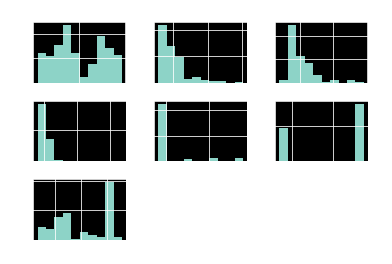

In [39]:
import matplotlib.pyplot as plt
dfs.hist()
plt.show()

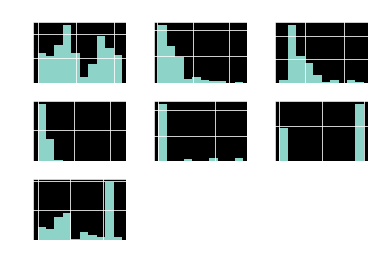

In [40]:
import matplotlib.pyplot as plt
df.hist()
plt.show()

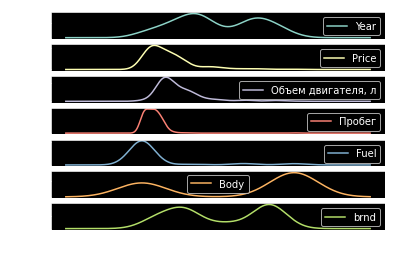

In [41]:
dfs.plot(kind='density',subplots=True,sharex=False)
plt.show()

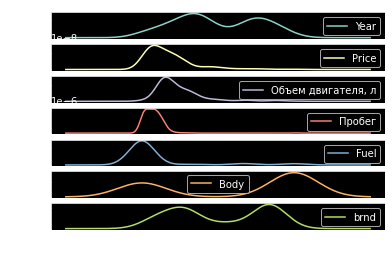

In [42]:
df.plot(kind='density',subplots=True,sharex=False)
plt.show()

Year                     AxesSubplot(0.125,0.125;0.0945122x0.755)
Price                 AxesSubplot(0.238415,0.125;0.0945122x0.755)
Объем двигателя, л    AxesSubplot(0.351829,0.125;0.0945122x0.755)
Пробег                AxesSubplot(0.465244,0.125;0.0945122x0.755)
Fuel                  AxesSubplot(0.578659,0.125;0.0945122x0.755)
Body                  AxesSubplot(0.692073,0.125;0.0945122x0.755)
brnd                  AxesSubplot(0.805488,0.125;0.0945122x0.755)
dtype: object

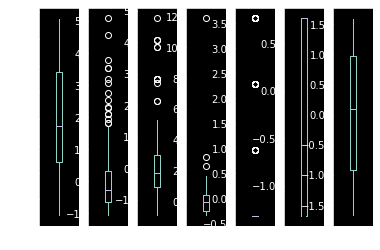

In [43]:
dfs.plot(kind='box',subplots=True,sharex=False,sharey=False)

Year                     AxesSubplot(0.125,0.125;0.0945122x0.755)
Price                 AxesSubplot(0.238415,0.125;0.0945122x0.755)
Объем двигателя, л    AxesSubplot(0.351829,0.125;0.0945122x0.755)
Пробег                AxesSubplot(0.465244,0.125;0.0945122x0.755)
Fuel                  AxesSubplot(0.578659,0.125;0.0945122x0.755)
Body                  AxesSubplot(0.692073,0.125;0.0945122x0.755)
brnd                  AxesSubplot(0.805488,0.125;0.0945122x0.755)
dtype: object

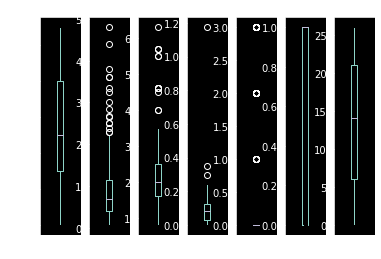

In [44]:
df.plot(kind='box',subplots=True,sharex=False,sharey=False)

array([[<AxesSubplot:xlabel='Year', ylabel='Year'>,
        <AxesSubplot:xlabel='Price', ylabel='Year'>,
        <AxesSubplot:xlabel='Объем двигателя, л', ylabel='Year'>,
        <AxesSubplot:xlabel='Пробег', ylabel='Year'>,
        <AxesSubplot:xlabel='Fuel', ylabel='Year'>,
        <AxesSubplot:xlabel='Body', ylabel='Year'>,
        <AxesSubplot:xlabel='brnd', ylabel='Year'>],
       [<AxesSubplot:xlabel='Year', ylabel='Price'>,
        <AxesSubplot:xlabel='Price', ylabel='Price'>,
        <AxesSubplot:xlabel='Объем двигателя, л', ylabel='Price'>,
        <AxesSubplot:xlabel='Пробег', ylabel='Price'>,
        <AxesSubplot:xlabel='Fuel', ylabel='Price'>,
        <AxesSubplot:xlabel='Body', ylabel='Price'>,
        <AxesSubplot:xlabel='brnd', ylabel='Price'>],
       [<AxesSubplot:xlabel='Year', ylabel='Объем двигателя, л'>,
        <AxesSubplot:xlabel='Price', ylabel='Объем двигателя, л'>,
        <AxesSubplot:xlabel='Объем двигателя, л', ylabel='Объем двигателя, л'>,
        <AxesSub

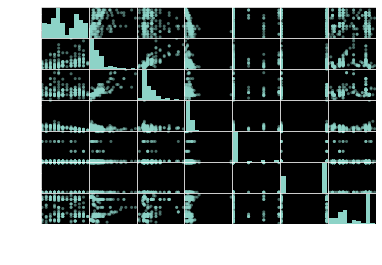

In [45]:
pd.plotting.scatter_matrix(dfs)

array([[<AxesSubplot:xlabel='Year', ylabel='Year'>,
        <AxesSubplot:xlabel='Price', ylabel='Year'>,
        <AxesSubplot:xlabel='Объем двигателя, л', ylabel='Year'>,
        <AxesSubplot:xlabel='Пробег', ylabel='Year'>,
        <AxesSubplot:xlabel='Fuel', ylabel='Year'>,
        <AxesSubplot:xlabel='Body', ylabel='Year'>,
        <AxesSubplot:xlabel='brnd', ylabel='Year'>],
       [<AxesSubplot:xlabel='Year', ylabel='Price'>,
        <AxesSubplot:xlabel='Price', ylabel='Price'>,
        <AxesSubplot:xlabel='Объем двигателя, л', ylabel='Price'>,
        <AxesSubplot:xlabel='Пробег', ylabel='Price'>,
        <AxesSubplot:xlabel='Fuel', ylabel='Price'>,
        <AxesSubplot:xlabel='Body', ylabel='Price'>,
        <AxesSubplot:xlabel='brnd', ylabel='Price'>],
       [<AxesSubplot:xlabel='Year', ylabel='Объем двигателя, л'>,
        <AxesSubplot:xlabel='Price', ylabel='Объем двигателя, л'>,
        <AxesSubplot:xlabel='Объем двигателя, л', ylabel='Объем двигателя, л'>,
        <AxesSub

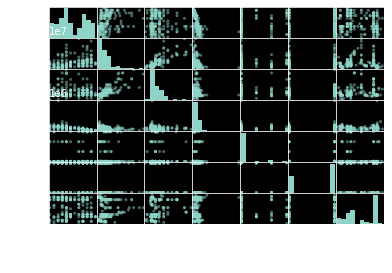

In [46]:
pd.plotting.scatter_matrix(df)

## Conclusion

1. the initial = 0.73

2. with standartization = 0.74

3. with normalization = 0.76


It is evident that with normalization it has highest precision and the initial is the lowest.

By the end, we got plots for initial and final data set, but the models look almost the same.

### If about grade, 

In my opinion my mark would be about 85-95.